In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve
import sympy as sym
import math
from IPython.display import display
pd.options.display.float_format = '{:,.2f}'.format
from numpy.linalg import inv

In [21]:
df = pd.read_csv("data.csv")

## Experimental Dataset Used:

In [22]:
print(df)

    T(deg C)   x1   y1
0      72.50 0.00 0.00
1      67.02 0.05 0.17
2      64.40 0.10 0.32
3      60.23 0.20 0.53
4      56.65 0.30 0.68
5      53.34 0.40 0.80
6      50.40 0.50 0.86
7      48.12 0.60 0.92
8      46.05 0.70 0.95
9      44.15 0.80 0.98
10     42.50 0.90 0.99
11     41.90 0.95 1.00
12     41.20 1.00 1.00


In [23]:
df['T(K)']=df['T(deg C)']+273.15
print(df)

    T(deg C)   x1   y1   T(K)
0      72.50 0.00 0.00 345.65
1      67.02 0.05 0.17 340.17
2      64.40 0.10 0.32 337.55
3      60.23 0.20 0.53 333.38
4      56.65 0.30 0.68 329.80
5      53.34 0.40 0.80 326.49
6      50.40 0.50 0.86 323.55
7      48.12 0.60 0.92 321.27
8      46.05 0.70 0.95 319.20
9      44.15 0.80 0.98 317.30
10     42.50 0.90 0.99 315.65
11     41.90 0.95 1.00 315.05
12     41.20 1.00 1.00 314.35


## Values used:
<ol>
<li>$g_{12}$ -$g_{22}$ =$A_{12}$= 764.6865 $cal/mol$</li>
<li>$g_{21}$ -$g_{11}$ =$A_{12}$= -226.3497 $cal/mol$</li>
<li>R= 1.98721 $cal/mol K$</li>
<li>$\alpha_{12}$= $\alpha_{21}$= $\alpha$= 0.2993</li>
<li>For 1-butanol, a=20.9 $barL^{2}$/$mol^{2}$ and b= 0.1323$L/mol$</li>
<li>For methacrylic acid, a=28.9 $barL^{2}$/$mol^{2}$ and b= 0.17$L/mol$</li>
<li>Model used for calculation of activity coeff is NRTL</li>
<li>Pressure (assumed constant) = 20$mmHg$</li>
</ol>

## Defining all the required functions
### Keys:
<ol>
<li>T12= $\tau_{12}$</li>
<li>T21= $\tau_{21}$</li>
<li>Y1= $\gamma_{1}$</li>
<li>Y2= $\gamma_{2}$</li>
<li>Pb_0= Saturated pressure by 1-Butanol</li>
<li>Pm_0= Saturated pressure by Methacrylic Acid</li>
<li>Notation: 1-> 1-Butanol and 2-> Methacrylic Acid</li>
<li>P_= Total pressure, given as 20mmHg</li>
<li>Bi_b(or Bi_m)= 2nd virial coeffiecient relation with van der waals constant</li>
<li>Phi_b(or Phi_m)= fugacity coeffiecient for components at T,P</li>
<li>Phi_b_sat(or Phi_m_sat)= fugacity coeffiecient for components at T,P_sat</li>
</ol>

In [24]:
def T12(T):
    return 764.6865/(1.98721*T)

def T21(T):
    return -226.3497/(1.98721*T)

def G12(T):
    return sym.exp(-1*0.2993*T12(T))

def G21(T):
    return sym.exp(-1*0.2993*T21(T))

def Y1(x1,T):
    return sym.exp((1-x1)**2*(T21(T)*(G21(T)/(x1+(1-x1)*G21(T)))**2 + T12(T)*G12(T)/(1-x1+x1*G12(T))**2))

def Y2(x1,T):
    return sym.exp(x1**2*(T12(T)*(G12(T)/(1-x1+x1*G12(T)))**2 + T21(T)*G21(T)/(x1+(1-x1)*G21(T))**2))

def Pb_0(T):
    T-=273.15
    return 10**(7.838-1558.19/(T+196.881))

def Pm_0(T):
    T-=273.15
    return 10**(8.97637-2621.47/(T+268.934))

def Bi_b(T):
    return 0.1323-(20.9/(0.083*T))

def Bi_m(T):
    return 0.17-(28.9/(0.083*T))

def phi_b(T):
    return sym.exp((Bi_b(T)*20)/(750*0.083*T))

def phi_b_sat(T):
    return sym.exp((Bi_b(T)*Pb_0(T))/(750*0.083*T))

def phi_m(T):
    return sym.exp((Bi_m(T)*20)/(750*0.083*T))

def phi_m_sat(T):
    return sym.exp((Bi_m(T)*Pm_0(T))/(750*0.083*T))

# Q1)
### For your selected binary system, assuming it as an ideal system (i.e. Raoult’s law is directly valid, and there is no deviation from ideal behaviour), Plot y v/s x (Vapour-Liquid equilibrium) curve

In [25]:
def solve1(P_, x):
    n=0
    tol=0.01
    T=300
    y1=0
    while True:
        y1=(x*Pb_0(T))/P_
        y2=((1-x)*Pm_0(T))/P_
        if(y1+y2<1+tol and y1+y2>1-tol):
            break
        elif(y1+y2>1+tol):
            T-=0.01
        else:
            T+=0.01
        if(n>5000):
            break
        n+=1
    ans=np.array([y1,T])
    return ans

In [26]:
P_=20
y1_calc1=[]
T_calc1=[]
for i in range(13):
    ans=solve1(P_,df.iloc[i][1])
    y1_calc1.append(round(ans[0],3))
    T_calc1.append(round(ans[1],3))

In [27]:
df['T_calc(K)_1']=pd.DataFrame(T_calc1)
df['y_calc_1']=pd.DataFrame(y1_calc1)
print(df)

    T(deg C)   x1   y1   T(K)  T_calc(K)_1  y_calc_1
0      72.50 0.00 0.00 345.65       345.57      0.00
1      67.02 0.05 0.17 340.17       341.51      0.23
2      64.40 0.10 0.32 337.55       338.19      0.39
3      60.23 0.20 0.53 333.38       333.01      0.59
4      56.65 0.30 0.68 329.80       329.06      0.71
5      53.34 0.40 0.80 326.49       325.90      0.79
6      50.40 0.50 0.86 323.55       323.27      0.85
7      48.12 0.60 0.92 321.27       321.04      0.89
8      46.05 0.70 0.95 319.20       319.10      0.92
9      44.15 0.80 0.98 317.30       317.39      0.95
10     42.50 0.90 0.99 315.65       315.86      0.97
11     41.90 0.95 1.00 315.05       315.15      0.98
12     41.20 1.00 1.00 314.35       314.48      0.99


### Plot:

In [28]:
x1= df['x1'].to_numpy()
y1= df['y1'].to_numpy()
y_calc= df['y_calc_1'].to_numpy()

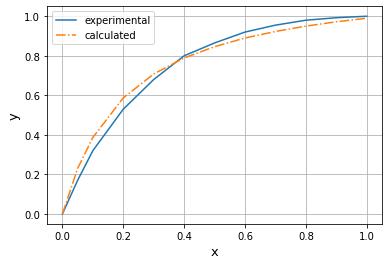

In [29]:
line1, = plt.plot(x1, y1, label='experimental')
line2, = plt.plot(x1, y_calc,'-.', label='calculated')
plt.legend(handles=[line1, line2], loc='best')
plt.xlabel("x", fontsize=13)
plt.ylabel("y",fontsize=13)
plt.grid()
plt.savefig("ideal.pdf")
plt.show()

### Error from experimental value for ideal roults law:

In [30]:
err=0
for i in range(13):
    err+=abs(df.iloc[i][2]- df.iloc[i][5])**2
err/=13
err=pow(err,0.5)
print(err)

0.03528730431973864


# Q2)
### For your selected binary system, assume it as a real system (meaning that deviation from ideal behaviour is present in both liquid and vapour phase): 
### (i) Plot y v/s x (vapour liquid equilibrium) curve in MATLAB for the same, taking into consideration the activity and fugacity coefficient in Raoult’s Law (state all assumptions that you have taken).


In [31]:
def solve2(P_, x):
    n=0
    tol=0.01
    T=300
    y1=0
    while True:
        y1=(x*Y1(x,T)*Pb_0(T)*phi_b_sat(T))/(P_*phi_b(T))
        y2=((1-x)*Y2(1-x,T)*Pm_0(T)*phi_m_sat(T))/(P_*phi_m(T))
        if(y1+y2<1+tol and y1+y2>1-tol):
            break
        elif(y1+y2>1+tol):
            T-=0.01
        else:
            T+=0.01
        if(n>5000):
            break
        n+=1
    ans=np.array([y1,T])
    return ans

In [32]:
P_=20
y1_calc2=[]
T_calc2=[]
for i in range(13):
    ans=solve2(P_,df.iloc[i][1])
    y1_calc2.append(round(ans[0],3))
    T_calc2.append(round(ans[1],3))

In [33]:
df['T_calc(K)2']=pd.DataFrame(T_calc2)
df['y_calc2']=pd.DataFrame(y1_calc2)
print(df)

    T(deg C)   x1   y1   T(K)  T_calc(K)_1  y_calc_1  T_calc(K)2 y_calc2
0      72.50 0.00 0.00 345.65       345.57      0.00      331.13       0
1      67.02 0.05 0.17 340.17       341.51      0.23      330.13   0.196
2      64.40 0.10 0.32 337.55       338.19      0.39      328.87   0.356
3      60.23 0.20 0.53 333.38       333.01      0.59      326.23   0.580
4      56.65 0.30 0.68 329.80       329.06      0.71      323.84   0.715
5      53.34 0.40 0.80 326.49       325.90      0.79      321.85   0.799
6      50.40 0.50 0.86 323.55       323.27      0.85      320.23   0.856
7      48.12 0.60 0.92 321.27       321.04      0.89      318.90   0.896
8      46.05 0.70 0.95 319.20       319.10      0.92      317.77   0.926
9      44.15 0.80 0.98 317.30       317.39      0.95      316.73   0.951
10     42.50 0.90 0.99 315.65       315.86      0.97      315.67   0.972
11     41.90 0.95 1.00 315.05       315.15      0.98      315.10   0.981
12     41.20 1.00 1.00 314.35       314.48      0.9

### Plot:

In [34]:
x1_= df['x1'].to_numpy()
y1_= df['y1'].to_numpy()
y_calc_= df['y_calc2'].to_numpy()

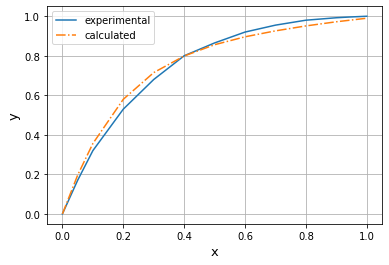

In [35]:
line1, = plt.plot(x1_, y1_, label='experimental')
line2, = plt.plot(x1_, y_calc_,'-.', label='calculated')
plt.legend(handles=[line1, line2], loc='best')
plt.xlabel("x", fontsize=13)
plt.ylabel("y",fontsize=13)
plt.grid()
plt.savefig("mod_roult.pdf")
plt.show()

### Error from experimental value for ideal roults law:

In [36]:
err=0
for i in range(13):
    err+=abs(df.iloc[i][2]- df.iloc[i][7])**2
err/=13
err=pow(err,0.5)
print(err)

0.0260002371945544
